<a href="https://colab.research.google.com/github/yosuke318/learn_ai/blob/100knock1/100_knock_3_totalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#2018/4~2019/3
import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

58254


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [3]:
#~2019/3/31
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [4]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [5]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [6]:
#join
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [7]:
# left join しているのでnullを確認
customer_join.isnull().sum()
#結合で追加したclass_name, price, campaign_nameにデータははいっている。

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [8]:
#会員区分、キャンペーン区分、性別、すでに退会済みかどうかごとに全体の数を把握してみましょう
customer_join.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [9]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [10]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [11]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [12]:
#入会人数は、start_date列が2018/4/1~2019/3/31までのユーザをcustomer_startへ
#to_datetime
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
print(len(customer_start))

1361


In [13]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()
#退会している顧客はいない

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [14]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [15]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [16]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [17]:
uselog["usedate"]=pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月", "customer_id"], as_index=False).count()
uselog_months.rename(columns={"log_id":"count"},inplace=True)
del uselog_months["usedate"]
uselog_months.head()
#集計はlog_idのカウントを取ればよいのでusedateはdelete

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [18]:
#平均値、中央値、最大値、最小値を集計します
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
uselog_customer.head()

,mean,median,max,min
customer_id,,,,
AS002855,4.0,4.5,5,2
AS008805,6.0,6.0,8,4
AS009013,2.0,2.0,2,2
AS009373,3.5,3.5,4,3
AS015233,6.0,7.0,7,4


In [19]:
#indexとして設定したcustomer_idをカラムにする
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.0,4.5,5,2
1,AS008805,6.0,6.0,8,4
2,AS009013,2.0,2.0,2,2
3,AS009373,3.5,3.5,4,3
4,AS015233,6.0,7.0,7,4


In [20]:

#まず顧客・月・曜日ごとの集計を行う。
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id", "年月", "weekday"], as_index = False).count()[["customer_id", "年月", "weekday", "log_id"]]
uselog_weekday

,customer_id,年月,weekday,log_id
0,AS002855,201804,5.0,4
1,AS002855,201805,2.0,1
2,AS002855,201805,5.0,4
3,AS002855,201806,5.0,5
4,AS002855,201807,5.0,2
...,...,...,...,...
30043,TS999855,201804,4.0,4
30044,TS999855,201805,5.0,3
30045,TS999855,201806,3.0,1
30046,TS999855,201806,5.0,5


In [21]:
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5.0,4
1,AS002855,201805,2.0,1
2,AS002855,201805,5.0,4
3,AS002855,201806,5.0,5
4,AS002855,201807,5.0,2


In [22]:
#顧客ごとに最大値が４以上の曜日が１か月でもあったユーザはフラグ１を立てる
#毎週来ていた月が一回でもあるユーザを特定する
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[["customer_id", "count"]]
uselog_weekday

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,4
4,AS015233,3
...,...,...
3469,TS993439,3
3470,TS995299,4
3471,TS999079,5
3472,TS999231,4


In [23]:
#週5回以上来ている人にはフラグを立てる
uselog_weekday["routine_flg"]=0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,4,1
4,AS015233,3,0


In [25]:
# 27
# customer_joinテーブルとuselog_customerテーブルを顧客idを使用して結合
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
#上とおなじ
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.50,4.0,8.0,2.0,1.0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.25,6.0,7.0,2.0,1.0
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3.75,4.0,5.0,2.0,1.0
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.75,5.0,7.0,2.0,1.0
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.50,3.5,6.0,1.0,1.0


In [26]:
# 欠損値確認
customer_join.isnull().sum()


customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean              718
median            718
max               718
min               718
routine_flg       718
dtype: int64

In [28]:
# 会員期間という軸を追加しましょう
# 3月で退会していない人のend_dateを20190430とする。
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0
# start_date ~ end_dateの期間を月で計算
for i in range(len(customer_join)):
  delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
  customer_join["membership_period"].iloc[i] = delta.years * 12 + delta.months
customer_join.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.50,4.0,8.0,2.0,1.0,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.25,6.0,7.0,2.0,1.0,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3.75,4.0,5.0,2.0,1.0,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.75,5.0,7.0,2.0,1.0,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.50,3.5,6.0,1.0,1.0,2019-04-30,47


In [29]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,3474.000000,3474.000000,3474.000000,3474.000000
mean,4.677365,4.788428,6.632124,2.513529
std,1.521180,1.750036,2.247298,1.195281
min,1.000000,1.000000,1.000000,1.000000
25%,3.750000,3.500000,5.000000,2.000000
50%,4.750000,4.500000,7.000000,2.000000
75%,5.750000,6.000000,8.000000,3.000000
max,12.000000,12.000000,14.000000,12.000000


In [30]:
#週５回以上来ている人の数
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0.0     969
1.0    2505
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

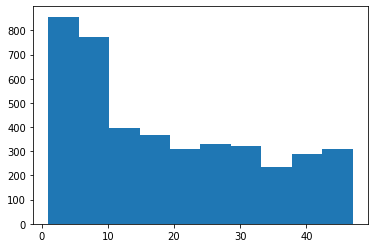

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

10か月以内でやめるユーザが多いですね。
短期間でユーザが離れていく業界なのでしょうか

In [32]:
#離れていくユーザの特徴を見ていきましょう。
#退会ユーザ
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1350.000000
mean,1.0,8595.555556,4.020051,4.052901,5.735495,2.244027,0.302901,8.026667
std,0.0,1949.163652,1.662880,1.848377,2.617683,1.307604,0.459709,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,2.750000,2.500000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,6.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,5.333333,5.500000,8.000000,3.000000,1.000000,11.000000
max,1.0,10500.000000,12.000000,12.000000,12.000000,12.000000,1.000000,23.000000


In [33]:
# 継続ユーザ
customer_stay = customer_join.loc[customer_join["is_deleted"]== 0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2842.000000
mean,0.0,8542.927516,5.012019,5.162902,7.088619,2.650738,0.933970,23.970443
std,0.0,1977.189779,1.324112,1.570993,1.875518,1.109242,0.248388,13.746761
min,0.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.000000,4.000000,6.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.000000,5.000000,7.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,6.000000,6.000000,8.000000,3.000000,1.000000,35.000000
max,0.0,10500.000000,9.000000,10.000000,14.000000,8.000000,1.000000,47.000000


利用回数の統計情報はすべて継続ユーザより下回っている。
週5回以上のroutine_flgの平均値に大きく差が出ている

In [34]:
customer_join.to_csv("customer_join.csv", index=False)